In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [2]:
np.random.seed(123)

In [3]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

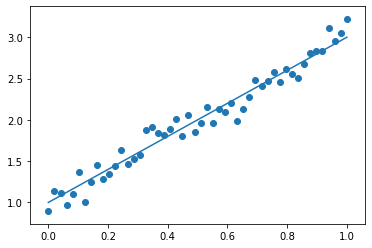

In [4]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [5]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike_coarse = tda.AdaptiveLogLike(y, cov_likelihood)
my_loglike_fine = tda.LogLike(y, cov_likelihood)

In [6]:
class MyCoarseLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x + 0.01
        qoi = None
        return output, qoi

In [7]:
class MyFineLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        #time.sleep(0.1)
        return output, qoi

In [8]:
my_link_factory_coarse = MyCoarseLinkFactory(my_prior, my_loglike_coarse)
my_link_factory_fine = MyFineLinkFactory(my_prior, my_loglike_fine)

In [9]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

#pcn_scaling = 0.1
#pcn_adaptive = True
#my_proposal = pda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

am_cov = np.eye(2)
am_t0 = 2000
am_sd = 1
am_epsilon = 1e-6
my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

In [10]:
my_chain = tda.FetchingDAChain(my_link_factory_coarse, my_link_factory_fine, my_proposal, subsampling_rate=10, fetching_rate=2)

2021-07-01 15:56:33,573	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265
(pid=1085694) /home/mikkel/OneDrive/Projects/tinyDA/git/tinyDA/proposal.py:131: RuntimeWarning: overflow encountered in exp
(pid=1085694)   return np.exp(proposal_link.posterior - previous_link.posterior)


In [11]:
my_chain.sample(2500)

  0%|          | 0/2500 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Running chain, α_c = 0.330, α_f = 0.60: 100%|█████████▉| 2499/2500 [00:27<00:00, 91.20it/s] 


In [12]:
burnin = 500

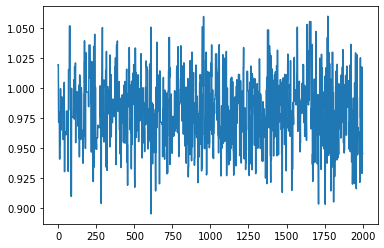

In [13]:
plt.plot([link.parameters[0] for link in my_chain.chain_fine[burnin:]])

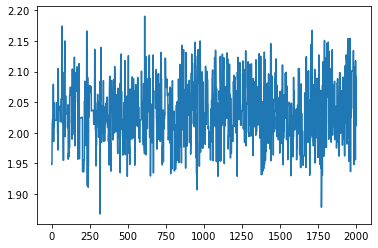

In [14]:
plt.plot([link.parameters[1] for link in my_chain.chain_fine[burnin:]])